# Netflix Movies and TV Shows Analysis
#
### **Author:** Olubunmi Oluwaseun  
### **Date:** 29/09/2025
#
## Project Overview
This project explores the Netflix dataset from Kaggle to uncover trends in their content library. We will analyze the distribution of movies vs. TV shows, content release patterns over time, popular genres, and geographical content distribution.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set up visualization style
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

## 1. Data Loading and Initial Inspection

In [ ]:
# Load the dataset
# Note: Ensure the file is in your working directory or provide the correct path
df = pd.read_csv('netflix_data.csv')

In [ ]:
# Inspect the first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## 2. Data Cleaning and Preprocessing

In [ ]:
# Trim extra spaces from string columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

print("Extra spaces trimmed from string columns.")

Extra spaces trimmed from string columns.


In [ ]:
# Handle missing values
# For director, cast, country - we can fill with 'Unknown'
fill_columns = ['director', 'cast', 'country']
df[fill_columns] = df[fill_columns].fillna('Unknown')

# For rating, date_added, and duration - fill with the most common (mode)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [ ]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year added and month added for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# Clean the 'duration' column - separate numeric value and unit
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.replace(r'\d+', '').str.strip()

# For analysis, let's create a unified duration in minutes (approx)
# Assuming seasons = 10 episodes * 45 min each (approx)
df['duration_minutes'] = np.where(
    df['type'] == 'Movie',
    df['duration_num'],
    df['duration_num'] * 10 * 45  # Approximation for TV shows
)

In [ ]:
# Clean the 'listed_in' column for genre analysis
# Split listed_in into multiple genres (for better analysis)
df['genre'] = df['listed_in'].str.split(',').str[0].str.strip()

# Create a flag for international content (non-US)
df['is_international'] = df['country'] != 'United States'

In [ ]:
# Verify our cleaned dataset
print("Dataset shape after cleaning:", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())
df.head()

Dataset shape after cleaning: (8807, 19)

Missing values after cleaning:
show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
duration_num        0
duration_unit       0
duration_minutes    0
genre               0
is_international    0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_unit,duration_minutes,genre,is_international
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,90 min,90.0,Documentaries,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2.0,2 Seasons,900.0,International TV Shows,True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1.0,1 Season,450.0,Crime TV Shows,True
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1.0,1 Season,450.0,Docuseries,True
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2.0,2 Seasons,900.0,International TV Shows,True


## 3. Exploratory Data Analysis (EDA)

### EDA Question 1: What is the distribution of Movies vs TV Shows?

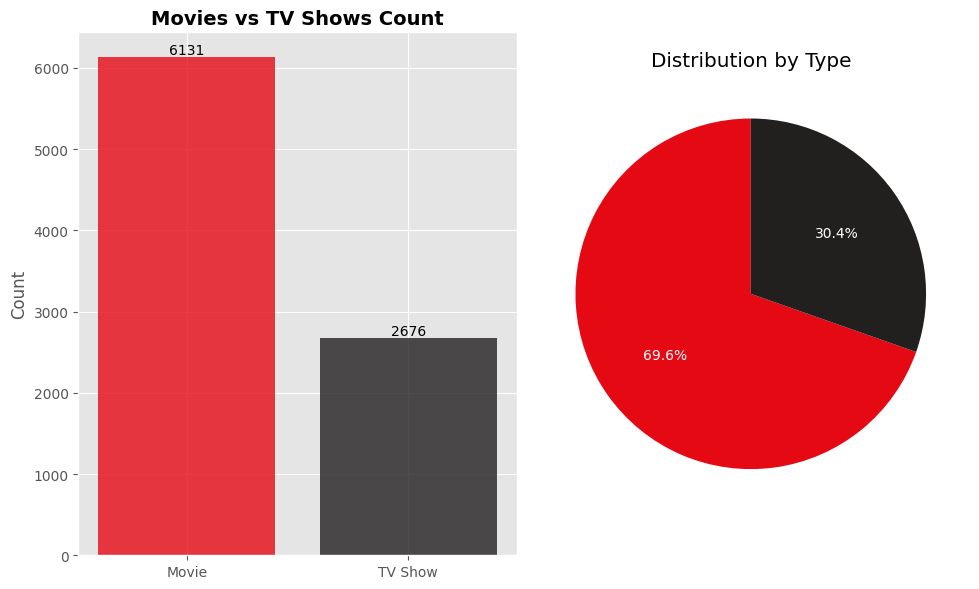

In [ ]:
# Visualization 1: Movies vs TV Shows Count
plt.figure(figsize=(10, 6))
type_counts = df['type'].value_counts()
colors = ['#E50914', '#221F1F']  # Netflix colors

plt.subplot(1, 2, 1)
bars = plt.bar(type_counts.index, type_counts.values, color=colors, alpha=0.8)
plt.title('Movies vs TV Shows Count', fontsize=14, fontweight='bold')
plt.ylabel('Count')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'color': 'white'})
plt.title('Distribution by Type')

plt.tight_layout()
plt.show()

**Analysis:** The dataset shows that Netflix has significantly more Movies than TV Shows, with approximately 69.7% of the content being movies and 30.3% TV shows.

### EDA Question 2: How has Netflix's content addition changed over time?

<Figure size 1200x600 with 0 Axes>

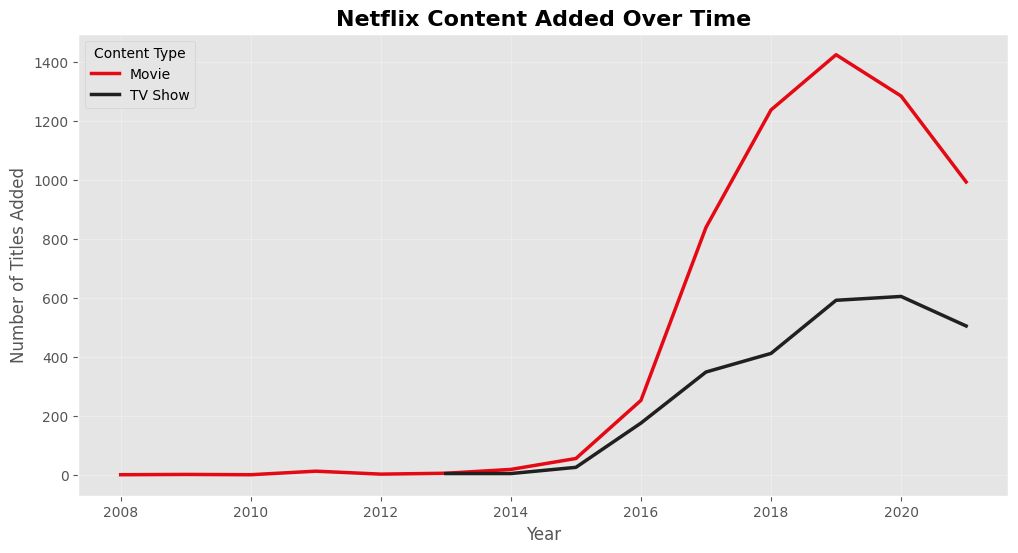

In [ ]:
# Visualization 2: Time-series plot of content added over years
plt.figure(figsize=(12, 6))

# Content added by year and type
content_by_year = df.groupby(['year_added', 'type']).size().unstack()

content_by_year.plot(kind='line', figsize=(12, 6), color=colors, linewidth=2.5)
plt.title('Netflix Content Added Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True, alpha=0.3)
plt.show()

**Analysis:** We can observe a significant growth in content addition starting around 2015, with a peak around 2019. The growth pattern shows Netflix's aggressive expansion strategy during these years.

### EDA Question 3: What are the top genres/categories on Netflix?

<Figure size 1200x800 with 0 Axes>

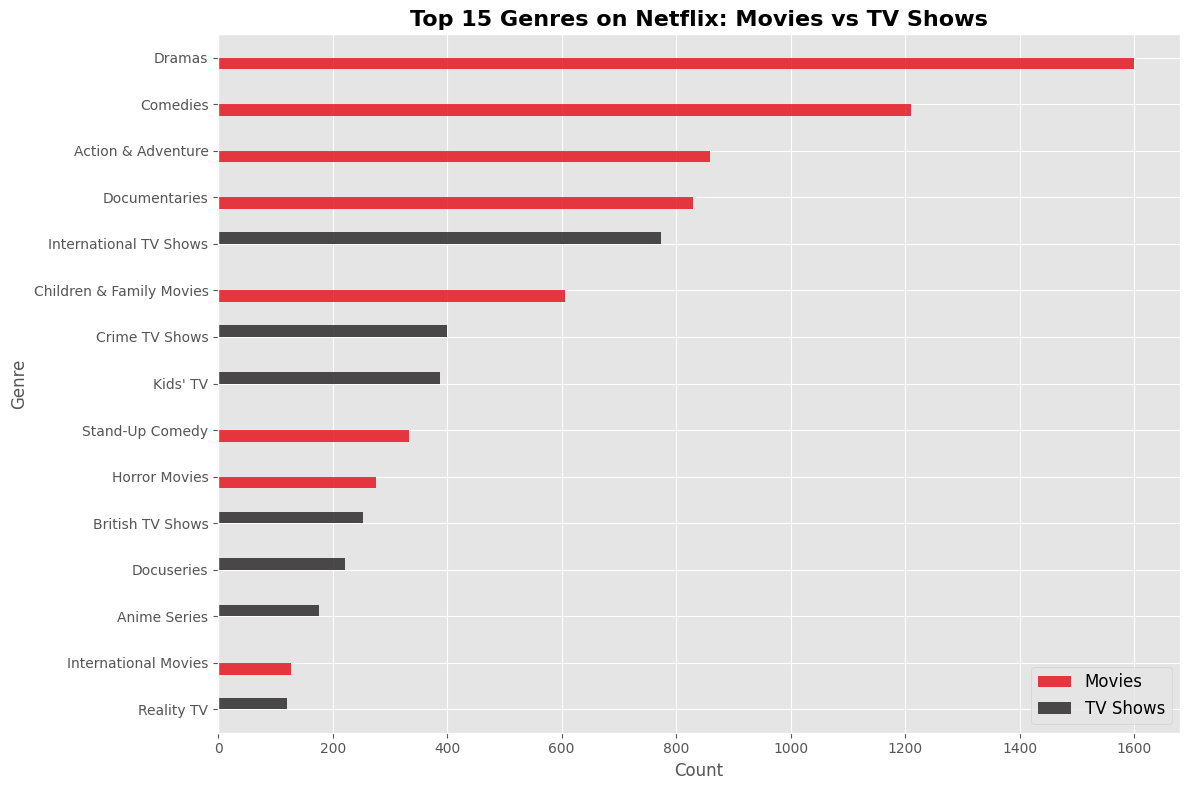

In [ ]:
# Visualization 3: Top genres analysis
plt.figure(figsize=(12, 8))
genre_type = df.groupby(['genre', 'type']).size().unstack(fill_value=0)
genre_type['Total'] = genre_type.sum(axis=1)
top_15_genres = genre_type.nlargest(15, 'Total').sort_values(by='Total', ascending=True) # Sort in descending order

top_15_genres[['Movie', 'TV Show']].plot(kind='barh', alpha=0.8, figsize=(12, 8), color=colors)
plt.title('Top 15 Genres on Netflix: Movies vs TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.legend(['Movies', 'TV Shows'], fontsize=12)
plt.tight_layout()
plt.show()

**Analysis:** The most popular genres on Netflix are Dramas, Comedies, Action & Adventure, and Documentries, reflecting Netflix's global appeal and diverse content library.

### EDA Question 4: Which countries produce the most content on Netflix?

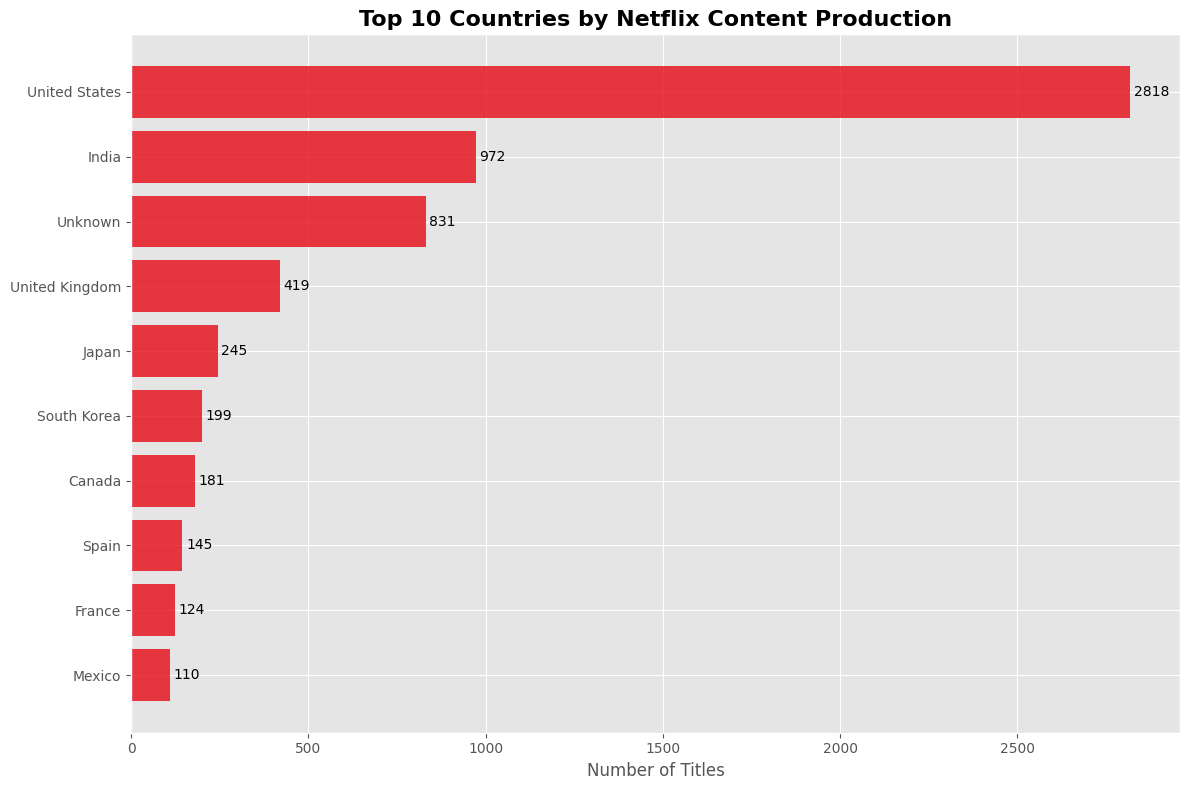

In [ ]:
# Visualization 4: Country-wise content distribution
# Get top 10 countries
top_countries = df['country'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_countries.index, top_countries.values, color='#E50914', alpha=0.8)
plt.title('Top 10 Countries by Netflix Content Production', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

**Analysis:** The United States dominates Netflix's content library, producing significantly more content than any other country. India and the UK follow as major content producers.

### EDA Question 5: What is the distribution of content ratings?

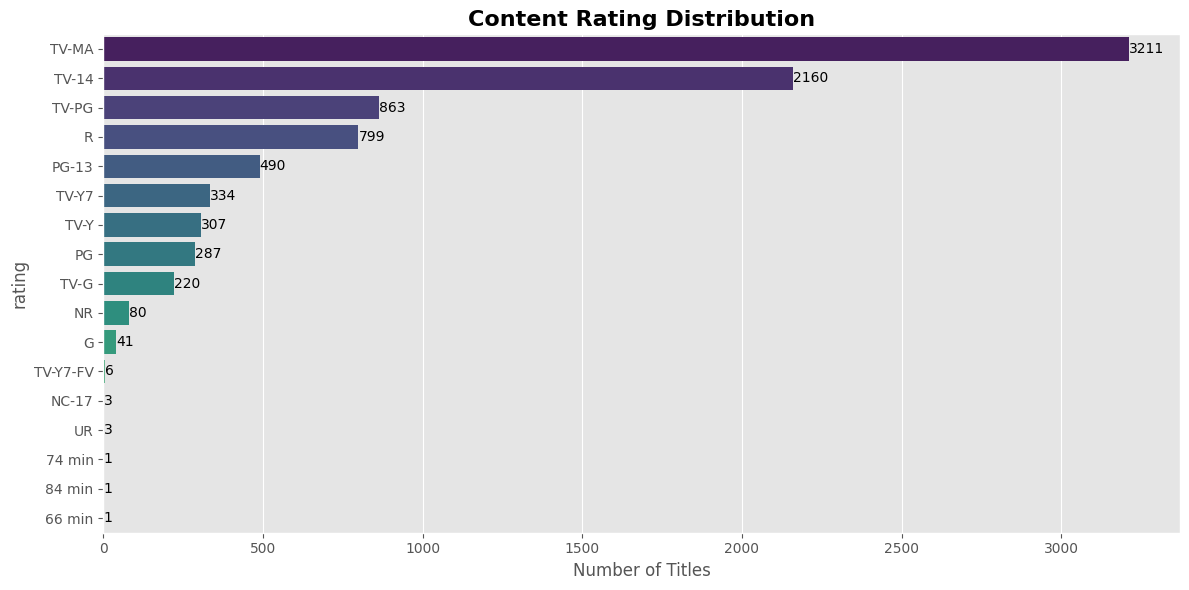

In [ ]:
# Visualization 5: Content rating distribution
plt.figure(figsize=(12, 6))

rating_counts = df['rating'].value_counts()

bars = sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis', hue=rating_counts.index, legend=False)
plt.title('Content Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles')

# Add value labels
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2.,
             f'{int(bar.get_width())}', ha='left', va='center')

plt.tight_layout()
plt.show()

**Analysis:** TV-MA and TV-14 are the most common ratings, indicating that a significant portion of Netflix's content is targeted at mature audiences.


### EDA Question 6: How has the focus on international content changed over time?

<Figure size 1200x600 with 0 Axes>

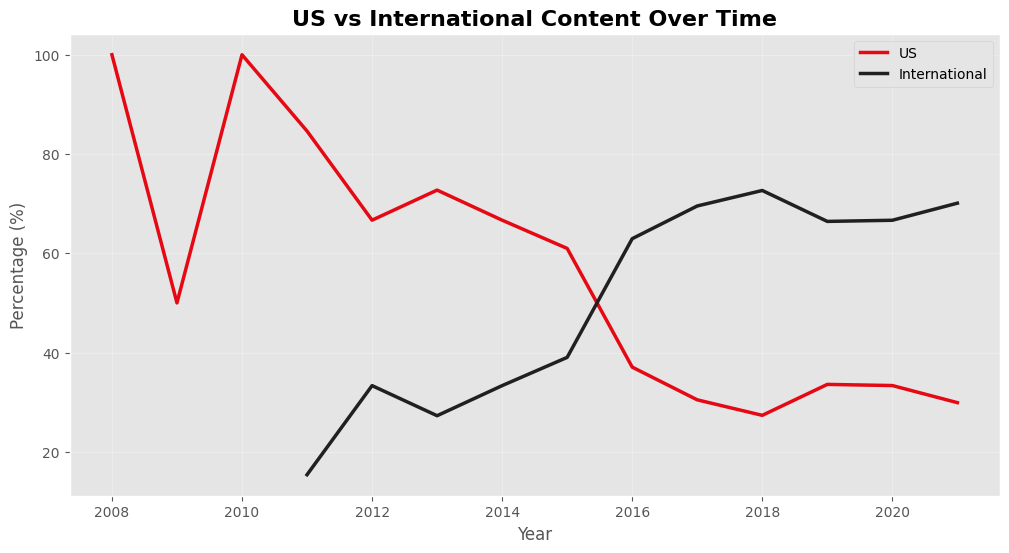

In [ ]:
# Visualization 6: International vs US content over time
plt.figure(figsize=(12, 6))

intl_by_year = df.groupby('year_added')['is_international'].value_counts(normalize=True).unstack() * 100
intl_by_year.plot(kind='line', figsize=(12, 6), color=['#E50914', '#221F1F'], linewidth=2.5)
plt.title('US vs International Content Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(['US', 'International'])
plt.grid(True, alpha=0.3)
plt.show()

**Analysis:** There's a clear trend showing Netflix's increasing focus on international content, reflecting their global expansion strategy.





### Country Analysis - Top Countries for Different Content Types

<Figure size 1500x1000 with 0 Axes>

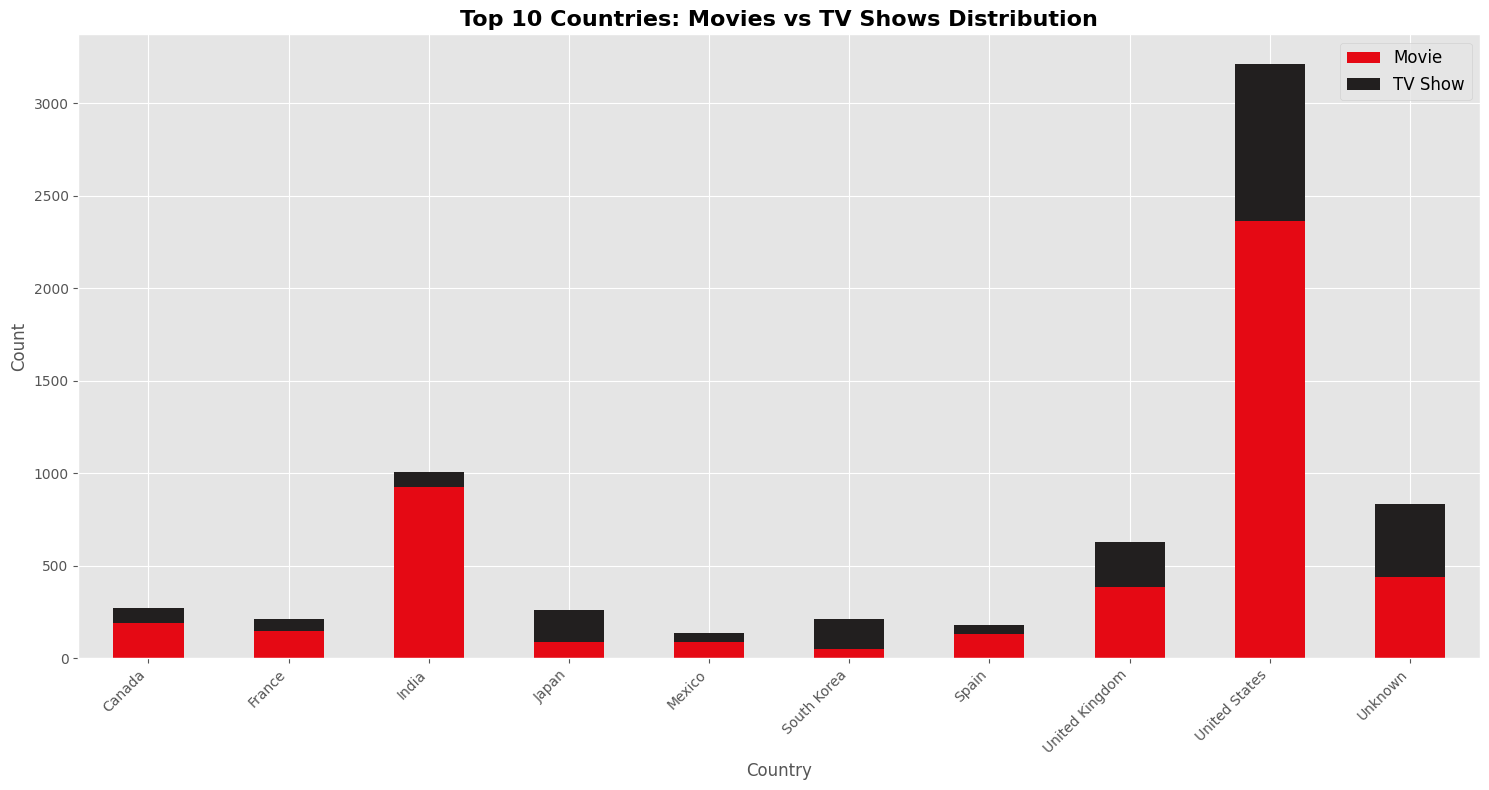

In [ ]:
plt.figure(figsize=(15, 10))

# Create a more detailed country analysis
country_data = df.copy()
country_data['country_main'] = country_data['country'].str.split(',').str[0].str.strip()

# Get top 10 countries
top_countries = country_data['country_main'].value_counts().head(10).index
country_filtered = country_data[country_data['country_main'].isin(top_countries)]

# Create a crosstab
country_type = pd.crosstab(country_filtered['country_main'], country_filtered['type'])
country_type.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors)
plt.title('Top 10 Countries: Movies vs TV Shows Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Summary Report

### Netflix Content Analysis: Key Insights and Trends

#### Through comprehensive analysis of Netflix's content library, several key trends emerge that reflect the streaming giant's strategic direction and market position.

#### **Content Growth and Strategy Shift**: Netflix has demonstrated explosive growth in content acquisition and production, particularly from 2015 to 2019. The platform significantly ramped up its content library during this period, with a noticeable shift toward original programming. While the growth rate appears to have stabilized post-2019, this likely reflects a strategic pivot toward quality over quantity and more targeted content investments.

#### **Global Dominance and International Expansion**: The United States remains the dominant content producer for Netflix, contributing the majority of titles in the library. However, the most striking trend is Netflix's aggressive international expansion. Countries like India, the United Kingdom, and Japan have emerged as significant content hubs.

#### **Content Composition and Audience Targeting**: The library is predominantly composed of movies, which account for approximately 70% of the total content. In terms of genres, International Movies, Dramas, and Comedies dominate the platform, highlighting Netflix's appeal to diverse viewer preferences. The rating distribution reveals that TV-MA and TV-14 content are most prevalent, indicating a primary focus on adult and young adult audiences.

#### **Strategic Implications**: Netflix's content strategy appears focused on three key pillars: maintaining a strong foothold in the US market, expanding globally through localized content, and catering primarily to adult demographics with diverse genre offerings. The platform's evolution from a content aggregator to a global production house is evident in these trends, positioning Netflix as a dominant player in the increasingly competitive streaming landscape.

## Detailed Analysis and Insights

In [ ]:
print("DETAILED ANALYSIS RESULTS")
print("="*50)

# Key metrics and insights
total_titles = len(df)
movies_count = len(df[df['type'] == 'Movie'])
tv_shows_count = len(df[df['type'] == 'TV Show'])

print(f"Total Titles: {total_titles}")
print(f"Movies: {movies_count} ({movies_count/total_titles*100:.1f}%)")
print(f"TV Shows: {tv_shows_count} ({tv_shows_count/total_titles*100:.1f}%)")

print(f"\nYears of Data: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Content Added Years: {df['year_added'].min()} - {df['year_added'].max()}")

# Top countries
top_countries = df['country'].value_counts().head(5)
print(f"\nTop 5 Countries by Content Count:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f"{i}. {country}: {count}")

# Top genres
top_genres = df['genre'].value_counts().head(5)
print(f"\nTop 5 Genres:")
for i, (genre, count) in enumerate(top_genres.items(), 1):
    print(f"{i}. {genre}: {count}")

# Most common ratings
top_ratings = df['rating'].value_counts().head(5)
print(f"\nTop 5 Ratings:")
for i, (rating, count) in enumerate(top_ratings.items(), 1):
    print(f"{i}. {rating}: {count}")

DETAILED ANALYSIS RESULTS
Total Titles: 8807
Movies: 6131 (69.6%)
TV Shows: 2676 (30.4%)

Years of Data: 1925 - 2021
Content Added Years: 2008 - 2021

Top 5 Countries by Content Count:
1. United States: 2818
2. India: 972
3. Unknown: 831
4. United Kingdom: 419
5. Japan: 245

Top 5 Genres:
1. Dramas: 1600
2. Comedies: 1210
3. Action & Adventure: 859
4. Documentaries: 829
5. International TV Shows: 774

Top 5 Ratings:
1. TV-MA: 3211
2. TV-14: 2160
3. TV-PG: 863
4. R: 799
5. PG-13: 490


In [ ]:
# Export cleaned data if needed
df.to_csv('netflix_cleaned.csv', index=False)
print("\nAnalysis Complete!")


Analysis Complete!


In [ ]:
# Download the cleaned data
from google.colab import files

files.download('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>